# 1. Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import time

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df_heart = pd.read_csv('heart.csv')
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df_score = pd.DataFrame(columns=['classifier', 'precision', 'recall', 'f1-score', 'time'])

# 2. Подготовка данных

## 2.1. Визуализация

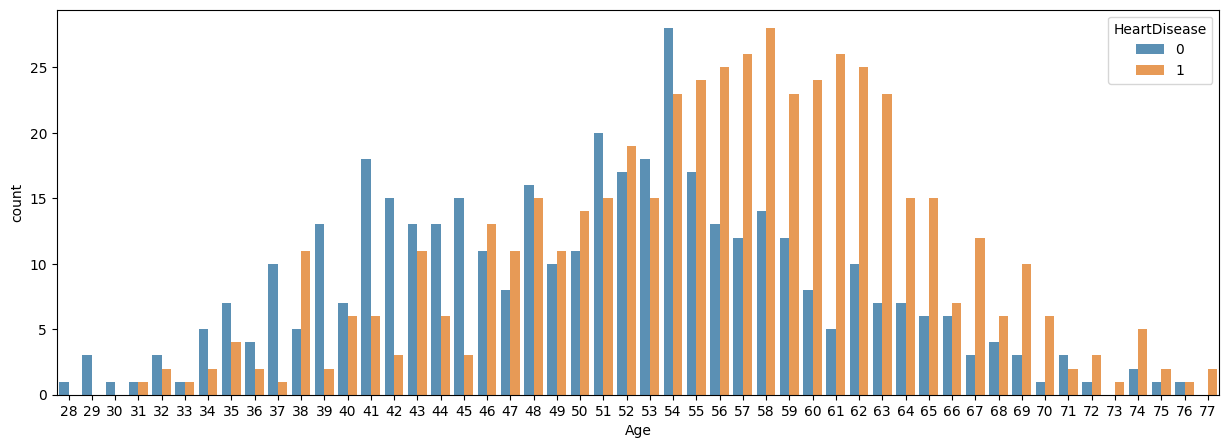

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(df_heart, x='Age', hue='HeartDisease', alpha=0.8)
plt.show()

По графику выше сразу можно понять о возрасте пациентов в датасете.

Кроме того, явный пик заболеваний сердца наблюдается в возрасте примерно 54-63. А минимальный возраст пациентов с болезнью сердца в датасете 31 год.

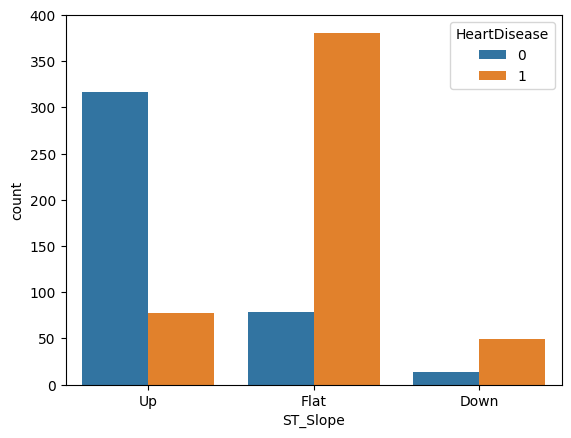

In [ ]:
sns.countplot(df_heart[['ST_Slope', 'HeartDisease']], hue='HeartDisease', x='ST_Slope')
plt.show()

График выше показывает, что болезнь сердца свойствена для значений Flat и Down наклона пикового сегмента ST при физической нагрузке.

Это логично, т.к. плоский и нисходящий наклоны пикового сегмента ST являются аномальными при нагрузке, а это может являться признаком заболевания сердца.

## 2.2. Работа с категориальными переменными

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df_heart.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
le = LabelEncoder()

df_heart['Sex'] = le.fit_transform(df_heart['Sex'])
df_heart['ExerciseAngina'] = le.fit_transform(df_heart['ExerciseAngina'])

In [ ]:
df_heart = pd.get_dummies(df_heart, ['ChestPainType', 'RestingECG', 'ST_Slope'])

In [ ]:
df_heart.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True


# 3. Разделение данных на train и test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_heart.drop(['HeartDisease'], axis=1)
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,False,False,True,False,False,True,False,False,False,True


In [ ]:
y = df_heart['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обучение дерева решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
def get_report(classifier, df_score, X_train, X_test, y_train, y_test, s_scaler=True, rs=42):
  t_start = time.time()

  model = classifier(random_state=rs)
  model.fit(X_train, y_train)

  t_end = time.time()

  y_pred = model.predict(X_test)

  title = classifier.__name__ + str('' if s_scaler else ' (without StandardScaler)')
  report = classification_report(y_test, y_pred, output_dict=True)['weighted avg']
  df_score.loc[len(df_score)] = {'classifier': title} | report | {'time': t_end - t_start}
  print(f'{title}:\n\n{classification_report(y_test, y_pred)}')

In [ ]:
get_report(DecisionTreeClassifier, df_score, X_train, X_test, y_train, y_test, False)

DecisionTreeClassifier (without StandardScaler):

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        77
           1       0.88      0.79      0.83       107

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184



In [ ]:
get_report(RandomForestClassifier, df_score, X_train, X_test, y_train, y_test, False)

RandomForestClassifier (without StandardScaler):

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



## 4.1. Стандартизация данных

In [ ]:
ss = StandardScaler()

X_columns = X_train.columns
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
get_report(DecisionTreeClassifier, df_score, X_train, X_test, y_train, y_test)

DecisionTreeClassifier:

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        77
           1       0.88      0.79      0.83       107

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



In [ ]:
get_report(RandomForestClassifier, df_score, X_train, X_test, y_train, y_test)

RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



Показатели немного улучшились.

# 5. Важность признаков

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

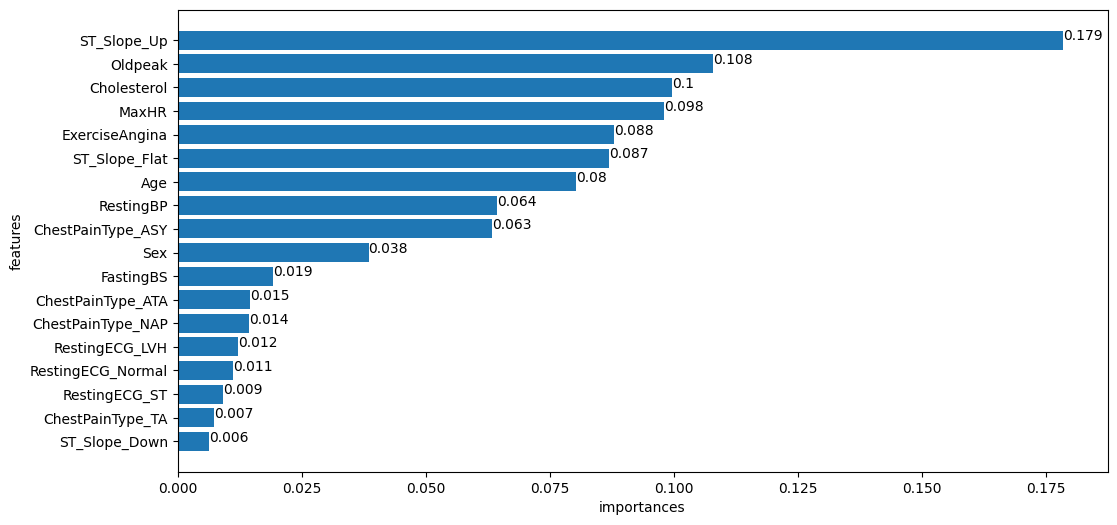

In [ ]:
features = pd.Series(data=model.feature_importances_, index=X_columns).sort_values(ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(features.index, features)

for i, value in enumerate(features):
  plt.text(value, i, round(value, 3))

plt.ylabel('features')
plt.xlabel('importances')
plt.show()

# 6. Бэггин

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
def get_bagging_report(model, df_score, X_train, X_test, y_train, y_test, n_est, max_s, max_f, rs=42):
  t_start = time.time()

  model_bagging = BaggingClassifier(model,
                           n_estimators=n_est,
                           max_samples=max_s,
                           max_features=max_f,
                           random_state=rs)

  model_bagging.fit(X_train, y_train)

  t_end = time.time()

  y_pred = model_bagging.predict(X_test)

  title = f'BaggingClassifier (est={n_est}, s={max_s}, f={max_f})'
  report = classification_report(y_test, y_pred, output_dict=True)['weighted avg']
  df_score.loc[len(df_score)] = {'classifier': title} | report | {'time': t_end - t_start}
  print(f'{title}:\n\n{classification_report(y_test, y_pred)}')

In [ ]:
get_bagging_report(model, df_score, X_train, X_test, y_train, y_test, 10, 0.5, 0.5)

BaggingClassifier (est=10, s=0.5, f=0.5):

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [ ]:
get_bagging_report(model, df_score, X_train, X_test, y_train, y_test, 10, 0.8, 0.8)

BaggingClassifier (est=10, s=0.8, f=0.8):

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
get_bagging_report(model, df_score, X_train, X_test, y_train, y_test, 10, 0.9, 0.9)

BaggingClassifier (est=10, s=0.9, f=0.9):

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [ ]:
get_bagging_report(model, df_score, X_train, X_test, y_train, y_test, 100, 0.5, 0.5)

BaggingClassifier (est=100, s=0.5, f=0.5):

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



# 7. Стекинг

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

In [ ]:
t_start = time.time()

modeL_stacking = StackingClassifier(
    [
        ('DecisionTreeClassifier', DecisionTreeClassifier()),
        ('RandomForestClassifier', RandomForestClassifier()),
        ('LinearSVC', LinearSVC(dual=False))])

modeL_stacking.fit(X_train, y_train)

t_end = time.time()

In [ ]:
y_pred = modeL_stacking.predict(X_test)

title = 'StackingClassifier'
report = classification_report(y_test, y_pred, output_dict=True)['weighted avg']
df_score.loc[len(df_score)] = {'classifier': title} | report | {'time': t_end - t_start}
print(f'{title}:\n\n{classification_report(y_test, y_pred)}')

StackingClassifier:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



# 8. Выводы

In [ ]:
df_score.head(10)

,classifier,precision,recall,f1-score,time
0,DecisionTreeClassifier (without StandardScaler),0.817935,0.809783,0.810970,0.010270
1,RandomForestClassifier (without StandardScaler),0.882024,0.880435,0.880810,0.218106
2,DecisionTreeClassifier,0.822237,0.815217,0.816322,0.006153
3,RandomForestClassifier,0.891886,0.891304,0.891488,0.209414
4,"BaggingClassifier (est=10, s=0.5, f=0.5)",0.859380,0.858696,0.858935,2.566970
5,"BaggingClassifier (est=10, s=0.8, f=0.8)",0.877242,0.875000,0.875470,1.731954
6,"BaggingClassifier (est=10, s=0.9, f=0.9)",0.891886,0.891304,0.891488,1.800867
7,"BaggingClassifier (est=100, s=0.5, f=0.5)",0.886904,0.885870,0.886149,17.542890
8,StackingClassifier,0.865259,0.864130,0.864463,1.684585


Лучшие метрики у модели **RandomForestClassifier**. Но при этом, наименьшее время обучения у **DecisionTreeClassifier**.


Стандартизация немного улучшила метрики DecisionTreeClassifier и RandomForestClassifier (все остальные модели уже обучались на стандартизированных данных).


**Бэггинг** и **стекинг** достаточно медленные по сравнению с остальными моделями. Например, бэггинг для 100 деревьев и 50% признаков/объектов обучался 24 секунды.

Для 10 деревьев и 90% признаков и объектов метрики бэггинга становятся равными RandomForestClassifier, но время обучения при этом гораздо больше.



Для **RandomForestClassifier** можно поэкспериментировать с параметрами:

In [ ]:
n_est = 50
max_d = 100

t_start = time.time()
m = RandomForestClassifier(n_estimators=n_est, max_depth=max_d, random_state = 42)
m.fit(X_train, y_train)
t_end = time.time()

y_pred = m.predict(X_test)

title = f'RandomForestClassifier (est={n_est}, depth={max_d})'
report = classification_report(y_test, y_pred, output_dict=True)['weighted avg']
df_score.loc[len(df_score)] = {'classifier': title} | report | {'time': t_end - t_start}

In [ ]:
df_score.head(20)

,classifier,precision,recall,f1-score,time
0,DecisionTreeClassifier (without StandardScaler),0.817935,0.809783,0.810970,0.010270
1,RandomForestClassifier (without StandardScaler),0.882024,0.880435,0.880810,0.218106
2,DecisionTreeClassifier,0.822237,0.815217,0.816322,0.006153
3,RandomForestClassifier,0.891886,0.891304,0.891488,0.209414
4,"BaggingClassifier (est=10, s=0.5, f=0.5)",0.859380,0.858696,0.858935,2.566970
5,"BaggingClassifier (est=10, s=0.8, f=0.8)",0.877242,0.875000,0.875470,1.731954
6,"BaggingClassifier (est=10, s=0.9, f=0.9)",0.891886,0.891304,0.891488,1.800867
7,"BaggingClassifier (est=100, s=0.5, f=0.5)",0.886904,0.885870,0.886149,17.542890
8,StackingClassifier,0.865259,0.864130,0.864463,1.684585
9,"RandomForestClassifier (est=50, depth=100)",0.897727,0.896739,0.896992,0.178231


Для 50 деревьев с максимальной глубиной 100 метрики немного увеличились, а время обучения сократилось.